In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter


In [59]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [60]:
df= pd.read_csv('bank_additional_full.csv')

In [61]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [63]:
def remove_outlier(df: pd.DataFrame, column: str, outlier_assumption: float) -> pd.DataFrame:
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    minimum = mean - outlier_assumption * std
    maximum = mean + outlier_assumption * std
    
    is_outlier = (df[column] < minimum) | (df[column] > maximum)
    
    sns.distplot(df[column], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Customers#')
    plt.show()
    df = df[~is_outlier]
    sns.distplot(df[column], hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Customers#')
    plt.show()
    
    return df

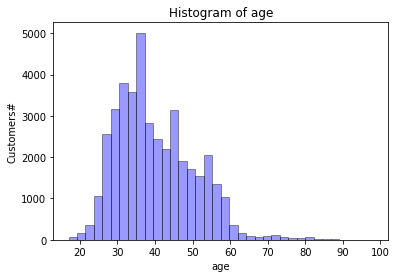

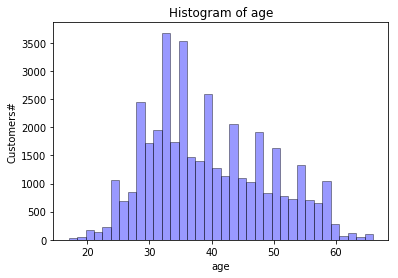

In [64]:
df= remove_outlier(df, 'age', 2.5)

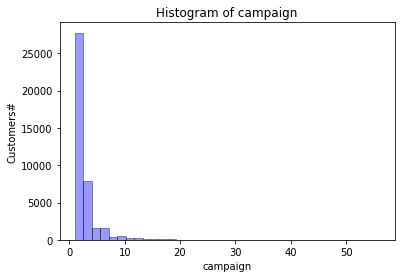

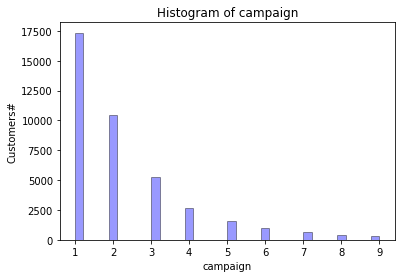

In [65]:
df= remove_outlier(df, 'campaign', 2.5)

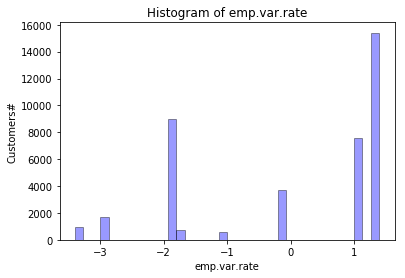

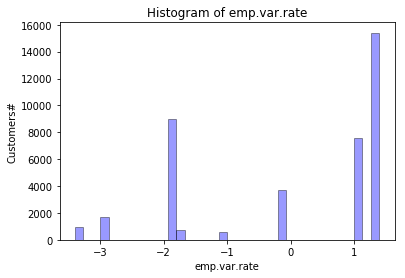

In [66]:
df= remove_outlier(df, 'emp.var.rate', 2.5)

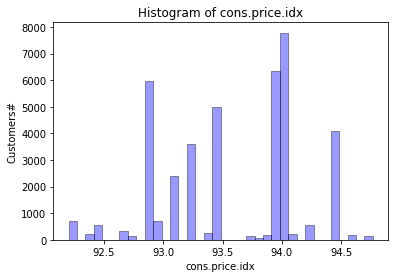

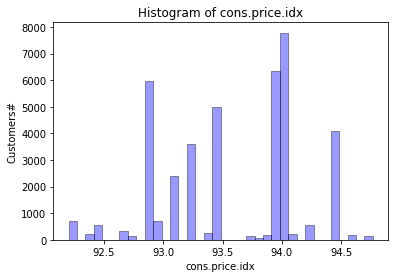

In [67]:
df= remove_outlier(df, 'cons.price.idx', 2.5)

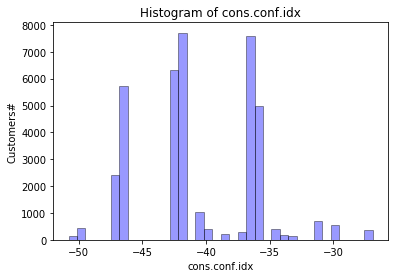

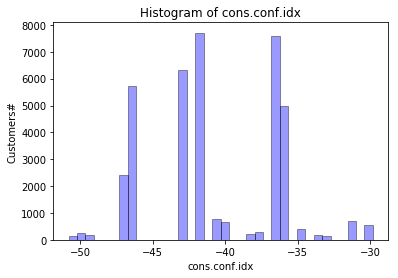

In [68]:
df= remove_outlier(df, 'cons.conf.idx', 2.5)

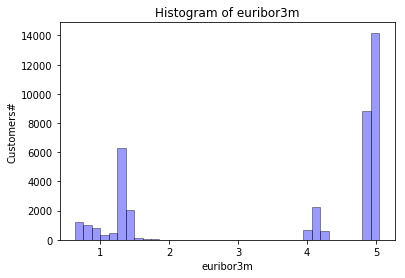

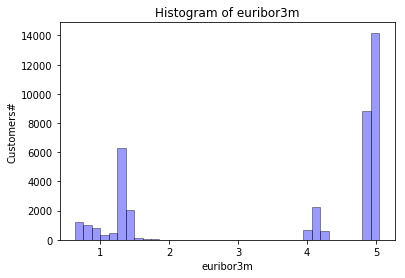

In [69]:
df= remove_outlier(df, 'euribor3m', 2.5)

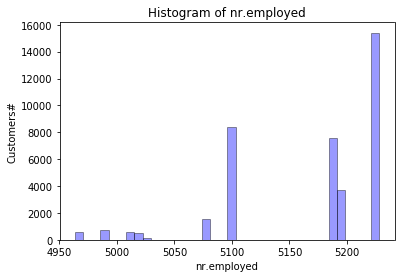

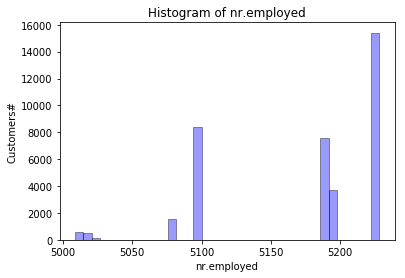

In [70]:
df= remove_outlier(df, 'nr.employed', 2.5)

In [71]:
df.shape

(37877, 21)

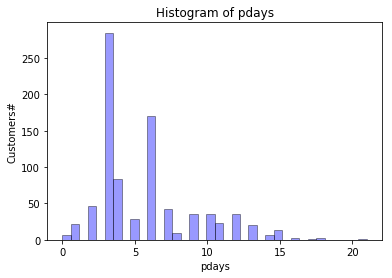

In [72]:
sns.distplot(df.pdays[df.pdays != 999], hist=True, kde=False, 
         bins=int(180/5), color = 'blue',
         hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of pdays')
plt.xlabel('pdays')
plt.ylabel('Customers#')
plt.show()

In [73]:
is_pdays_999 = df['pdays'] == 999
df.loc[is_pdays_999, 'pdays_c'] = "never contacted"
df.loc[~is_pdays_999, 'pdays_c'] = pd.qcut(df.loc[~is_pdays_999, 'pdays'], 4, labels=["very recently contacted","recently contacted", "moderately recently contacted", "contacted long ago"])
df[['pdays_c', 'pdays']]

df.drop('pdays', 1, inplace= True)

In [74]:
is_previous_0 = df['previous'] == 0
df.loc[~is_previous_0, 'previous_c'] = pd.cut(df.previous,bins=[0, 1, 4, 7],labels=["contacted once", "rarely contacted", "frequently contacted"])
df.loc[is_previous_0, 'previous_c'] = "never contacted"
df[['previous_c', 'previous']]

df.drop('previous', 1, inplace= True)

In [75]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'pdays_c',
 'previous_c']

In [76]:
def create_distributions_by_target(df, column):

    # Sort the dataframe by target
    target_yes = df.loc[df['y'] == 'yes']
    target_no = df.loc[df['y'] == 'no']

    sns.distplot(target_yes[[column]], hist=False, rug=True, label = 'purchased')
    sns.distplot(target_no[[column]], hist=False, rug=True , label = 'not')
    plt.xlabel(column)
    plt.ylabel('Customers#')
    plt.legend()
    fig = plt.title('Distribution of {} by purcharse'.format(column))
    return fig

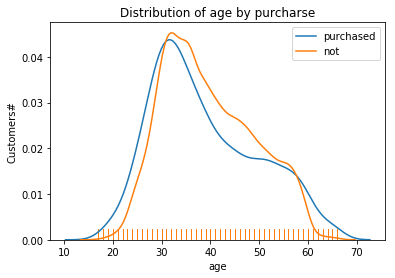

In [77]:
age = create_distributions_by_target(df, 'age')

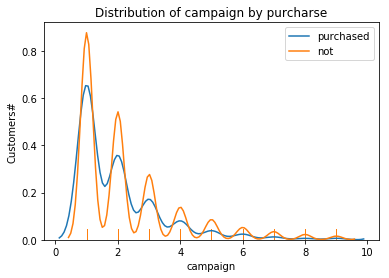

In [78]:
campaign = create_distributions_by_target(df, 'campaign')

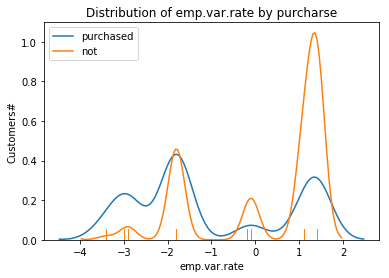

In [79]:
emp_var_rate = create_distributions_by_target(df, 'emp.var.rate')

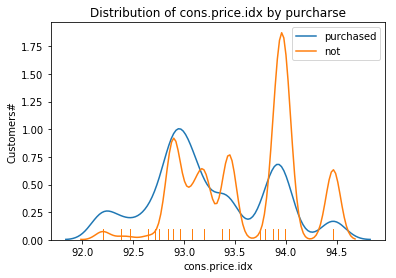

In [80]:
cons_price_idx = create_distributions_by_target(df, 'cons.price.idx')

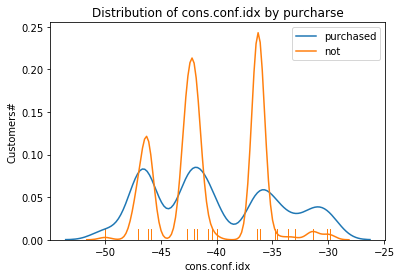

In [81]:
cons_conf_idx = create_distributions_by_target(df, 'cons.conf.idx')

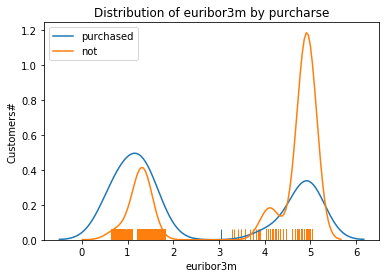

In [82]:
euribor3m  = create_distributions_by_target(df, 'euribor3m')

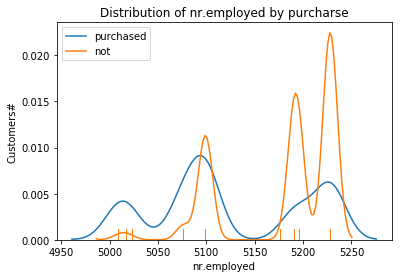

In [83]:
nr_employed = create_distributions_by_target(df, 'nr.employed')

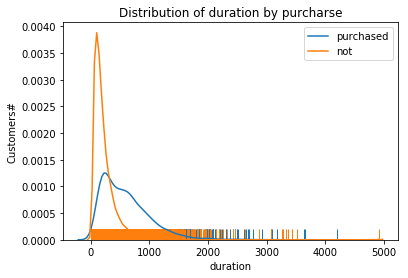

In [84]:
duration = create_distributions_by_target(df, 'duration')

In [85]:
is_purchased = df['y'] == 'yes'
df.loc[is_purchased, 'target'] = 1
df.loc[~is_purchased, 'target'] = 0
df[['target', 'y']]
df.drop('y', 1, inplace= True)

In [86]:
df_num= df[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','target']]
corr_num = df_num.corr()
corr_num.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1,-0.00656053,0.00687549,0.0818258,0.0547746,0.109962,0.0920231,0.0777821,-0.0242103
duration,-0.00656053,1,-0.0373282,-0.0144076,0.00573984,-0.0120443,-0.0171548,-0.0246509,0.423297
campaign,0.00687549,-0.0373282,1,0.10192,0.0879727,-0.00723891,0.081965,0.0955402,-0.0460716
emp.var.rate,0.0818258,-0.0144076,0.10192,1,0.845136,0.328424,0.978759,0.95469,-0.257349
cons.price.idx,0.0547746,0.00573984,0.0879727,0.845136,1,0.190927,0.805977,0.735563,-0.185322
cons.conf.idx,0.109962,-0.0120443,-0.00723891,0.328424,0.190927,1,0.397912,0.217505,0.0278984
euribor3m,0.0920231,-0.0171548,0.081965,0.978759,0.805977,0.397912,1,0.9626,-0.248442
nr.employed,0.0777821,-0.0246509,0.0955402,0.95469,0.735563,0.217505,0.9626,1,-0.274426
target,-0.0242103,0.423297,-0.0460716,-0.257349,-0.185322,0.0278984,-0.248442,-0.274426,1


In [87]:
df.drop('duration',1,inplace=True)
df.drop('emp.var.rate',1,inplace=True)
df.drop('nr.employed',1,inplace=True)

In [88]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'poutcome',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'pdays_c',
 'previous_c',
 'target']

In [89]:
def percentage_data_by_class(column):
    df_grouped = df[['target', column]].groupby([column, 'target']).size().reset_index()
    df_grouped.rename(columns={0:'count'}, inplace=True)

    df_pivot = df_grouped.pivot(column, 'target')
    df_flatenned = pd.DataFrame(df_pivot.to_records())
    df_flatenned.fillna(0, inplace= True)
    df_flatenned.columns = [column, 'no_count', 'yes_count']
    df_flatenned['Percentage purchased'] = 100 * df_flatenned.yes_count / (df_flatenned.yes_count + df_flatenned.no_count)
        
    return df_flatenned

def chart_by_class(column):
    df_use = percentage_data_by_class(column)
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=column, y='Percentage purchased', data=df_use)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        height = round(p.get_height())
        ax.text(p.get_x(), height + 0.85, str(height), color='blue')
    plt.tight_layout()
    return ax

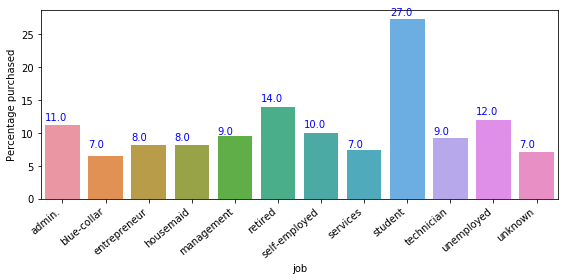

In [90]:
chart_by_class('job')

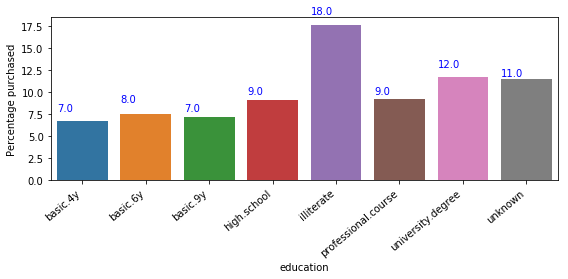

In [91]:
chart_by_class('education')

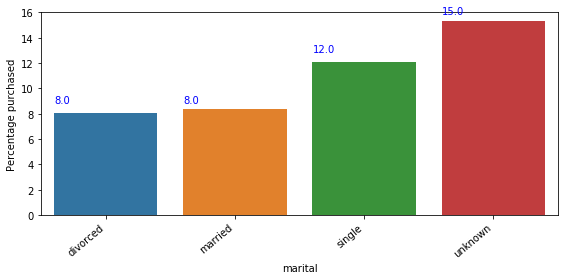

In [92]:
chart_by_class('marital')

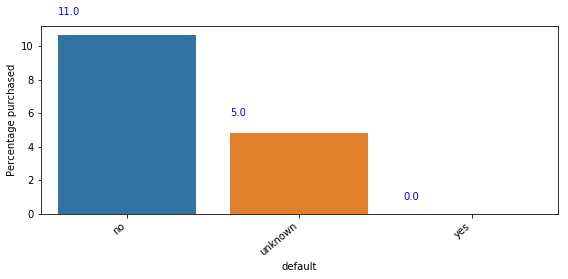

In [93]:
chart_by_class('default')

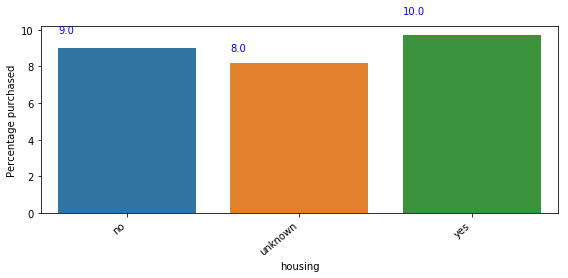

In [94]:
chart_by_class('housing')

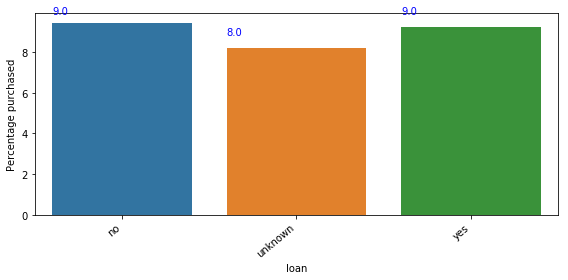

In [95]:
chart_by_class('loan')

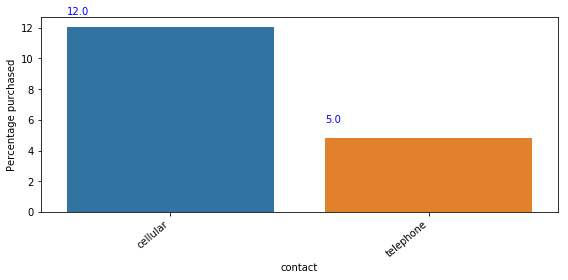

In [96]:
chart_by_class('contact')

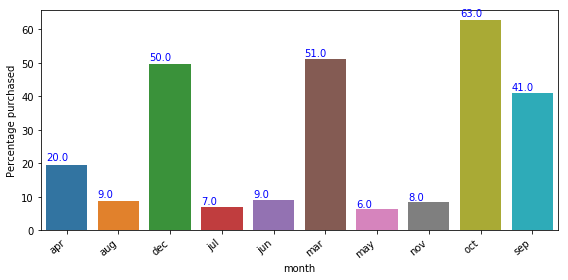

In [97]:
chart_by_class('month')

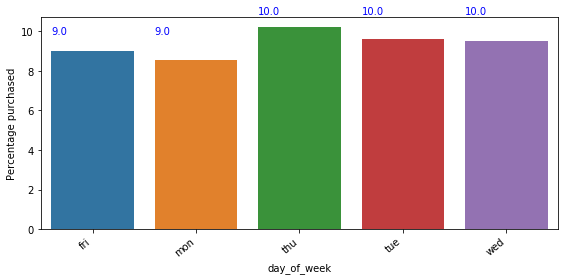

In [98]:
chart_by_class('day_of_week')

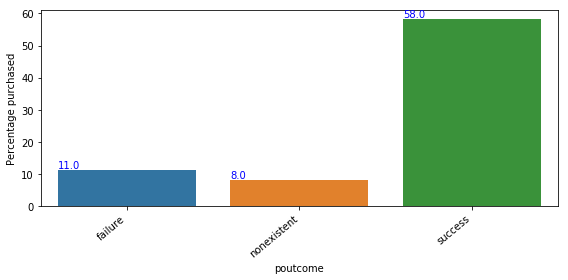

In [99]:
chart_by_class('poutcome')

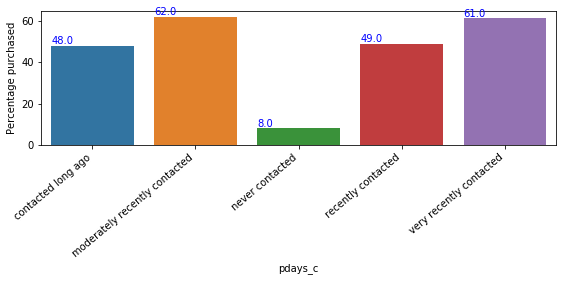

In [100]:
chart_by_class('pdays_c')

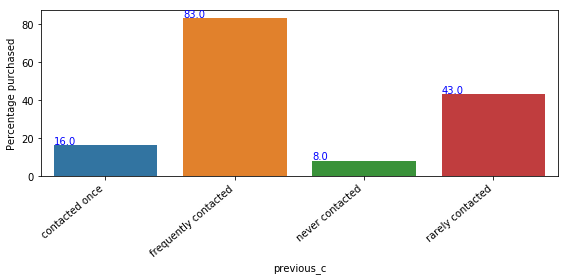

In [101]:
chart_by_class('previous_c')

In [102]:
df= pd.get_dummies(df)
print(list(df))

['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexiste

In [103]:
df.shape

(37877, 68)

In [104]:
df_feature= df.drop('target',1)
df_target= df['target']
trn_feature, test_feature, trn_y, test_y = train_test_split(df_feature, df_target, test_size=0.25, random_state=12)
train_feature, dev_feature, train_y, dev_y = train_test_split(trn_feature, trn_y, test_size=0.33, random_state=12)
# sm = SMOTE(random_state=12, ratio = 1.0)
# train_feature_res, train_y_res = sm.fit_sample(train_feature,train_y)
dev_y = dev_y.values
dev_feature = dev_feature.values
test_feature = test_feature.values
test_y = test_y.values
train_feature = train_feature.values
train_y = train_y.values

Text(0, 0.5, 'Frequency')

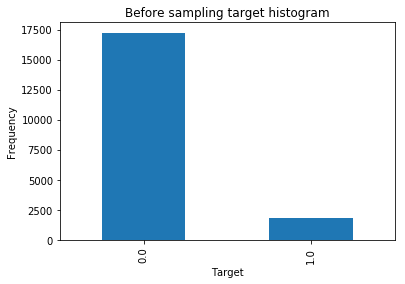

In [105]:
training = pd.DataFrame()
training['y'] = train_y
pd.value_counts(training['y']).plot.bar()
plt.title('Before sampling target histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')

In [49]:
# training_res = pd.DataFrame()
# training_res['y'] = train_y_res
# pd.value_counts(training_res['y']).plot.bar()
# plt.title('After sampling target histogram')
# plt.xlabel('Target')
# plt.ylabel('Frequency')

In [106]:
df.shape

(37877, 68)

In [107]:
df.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_success,pdays_c_contacted long ago,pdays_c_moderately recently contacted,pdays_c_never contacted,pdays_c_recently contacted,pdays_c_very recently contacted,previous_c_contacted once,previous_c_frequently contacted,previous_c_never contacted,previous_c_rarely contacted
0,56,1,93.994,-36.4,4.857,0.0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,93.994,-36.4,4.857,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,93.994,-36.4,4.857,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,93.994,-36.4,4.857,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,93.994,-36.4,4.857,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [108]:
print('train data size', len(train_feature))
print('dev data size', len(dev_feature))
print('test data size', len(test_feature))

train data size 19032
dev data size 9375
test data size 9470


In [109]:
print(train_feature.shape)
print(train_y.shape)

(19032, 67)
(19032,)


In [110]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [358]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
import numpy
from keras.regularizers import l2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import keras.backend as K
from sklearn.model_selection import StratifiedKFold
# fix random seed for reproducibility
seed = 42

numpy.random.seed(seed)
X = train_feature
Y = train_y

class_weight = {1.0:10,
                0.0: 1}

model = Sequential()
model.add(Dense(68, input_dim=67, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# fit model
history = model.fit(X, Y, validation_data=(dev_feature, dev_y), epochs=1000, 
                    verbose=2, callbacks=[mc,es], class_weight = class_weight)
# load the saved model
saved_model = load_model('best_model.h5')

Train on 19032 samples, validate on 9375 samples
Epoch 1/1000
 - 7s - loss: 1.2867 - acc: 0.6155 - val_loss: 0.7414 - val_acc: 0.5553

Epoch 00001: val_loss improved from inf to 0.74141, saving model to best_model.h5
Epoch 2/1000
 - 3s - loss: 1.1693 - acc: 0.6760 - val_loss: 0.7232 - val_acc: 0.5684

Epoch 00002: val_loss improved from 0.74141 to 0.72317, saving model to best_model.h5
Epoch 3/1000
 - 3s - loss: 1.1219 - acc: 0.7111 - val_loss: 0.6015 - val_acc: 0.7811

Epoch 00003: val_loss improved from 0.72317 to 0.60148, saving model to best_model.h5
Epoch 4/1000
 - 3s - loss: 1.0955 - acc: 0.7367 - val_loss: 0.4567 - val_acc: 0.8487

Epoch 00004: val_loss improved from 0.60148 to 0.45666, saving model to best_model.h5
Epoch 5/1000
 - 3s - loss: 1.0716 - acc: 0.7620 - val_loss: 0.8166 - val_acc: 0.4770

Epoch 00005: val_loss did not improve from 0.45666
Epoch 6/1000
 - 3s - loss: 1.0803 - acc: 0.7503 - val_loss: 0.6200 - val_acc: 0.7566

Epoch 00006: val_loss did not improve from 0


Epoch 00058: val_loss did not improve from 0.39193
Epoch 59/1000
 - 4s - loss: 0.9984 - acc: 0.7968 - val_loss: 0.6679 - val_acc: 0.6879

Epoch 00059: val_loss did not improve from 0.39193
Epoch 60/1000
 - 4s - loss: 0.9954 - acc: 0.7963 - val_loss: 0.5399 - val_acc: 0.7754

Epoch 00060: val_loss did not improve from 0.39193
Epoch 61/1000
 - 3s - loss: 0.9934 - acc: 0.7985 - val_loss: 0.5307 - val_acc: 0.8004

Epoch 00061: val_loss did not improve from 0.39193
Epoch 62/1000
 - 3s - loss: 0.9955 - acc: 0.7917 - val_loss: 0.5254 - val_acc: 0.8284

Epoch 00062: val_loss did not improve from 0.39193
Epoch 63/1000
 - 3s - loss: 0.9950 - acc: 0.8104 - val_loss: 0.6562 - val_acc: 0.6898

Epoch 00063: val_loss did not improve from 0.39193
Epoch 64/1000
 - 3s - loss: 0.9915 - acc: 0.7976 - val_loss: 0.5469 - val_acc: 0.7941

Epoch 00064: val_loss did not improve from 0.39193
Epoch 65/1000
 - 3s - loss: 0.9915 - acc: 0.7984 - val_loss: 0.5315 - val_acc: 0.8097

Epoch 00065: val_loss did not imp

 - 4s - loss: 0.9184 - acc: 0.7980 - val_loss: 0.5879 - val_acc: 0.7339

Epoch 00118: val_loss did not improve from 0.39193
Epoch 119/1000
 - 3s - loss: 0.9167 - acc: 0.7916 - val_loss: 0.4805 - val_acc: 0.8182

Epoch 00119: val_loss did not improve from 0.39193
Epoch 120/1000
 - 3s - loss: 0.9135 - acc: 0.7951 - val_loss: 0.5722 - val_acc: 0.7533

Epoch 00120: val_loss did not improve from 0.39193
Epoch 121/1000
 - 3s - loss: 0.9159 - acc: 0.7851 - val_loss: 0.5305 - val_acc: 0.7813

Epoch 00121: val_loss did not improve from 0.39193
Epoch 122/1000
 - 3s - loss: 0.9143 - acc: 0.7900 - val_loss: 0.5597 - val_acc: 0.7607

Epoch 00122: val_loss did not improve from 0.39193
Epoch 123/1000
 - 4s - loss: 0.9151 - acc: 0.7941 - val_loss: 0.4889 - val_acc: 0.8078

Epoch 00123: val_loss did not improve from 0.39193
Epoch 124/1000
 - 4s - loss: 0.9189 - acc: 0.7835 - val_loss: 0.5188 - val_acc: 0.8005

Epoch 00124: val_loss did not improve from 0.39193
Epoch 125/1000
 - 4s - loss: 0.9021 - acc:

 - 4s - loss: 0.8198 - acc: 0.7915 - val_loss: 0.5705 - val_acc: 0.7499

Epoch 00177: val_loss did not improve from 0.39193
Epoch 178/1000
 - 4s - loss: 0.8241 - acc: 0.7956 - val_loss: 0.5918 - val_acc: 0.7326

Epoch 00178: val_loss did not improve from 0.39193
Epoch 179/1000
 - 5s - loss: 0.8222 - acc: 0.7925 - val_loss: 0.6062 - val_acc: 0.7322

Epoch 00179: val_loss did not improve from 0.39193
Epoch 180/1000
 - 4s - loss: 0.8218 - acc: 0.7901 - val_loss: 0.5642 - val_acc: 0.7536

Epoch 00180: val_loss did not improve from 0.39193
Epoch 181/1000
 - 3s - loss: 0.8099 - acc: 0.7928 - val_loss: 0.5539 - val_acc: 0.7468

Epoch 00181: val_loss did not improve from 0.39193
Epoch 182/1000
 - 3s - loss: 0.8104 - acc: 0.7915 - val_loss: 0.5654 - val_acc: 0.7502

Epoch 00182: val_loss did not improve from 0.39193
Epoch 183/1000
 - 3s - loss: 0.8034 - acc: 0.7954 - val_loss: 0.5043 - val_acc: 0.7874

Epoch 00183: val_loss did not improve from 0.39193
Epoch 184/1000
 - 3s - loss: 0.8005 - acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


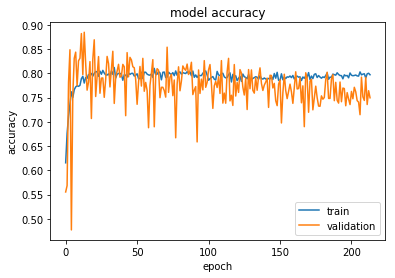

In [359]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

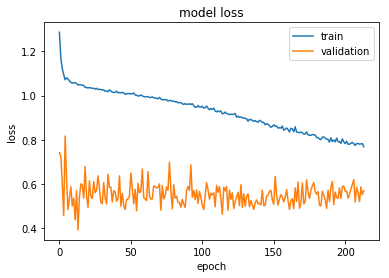

In [360]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()